In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [10]:
df = pd.read_csv("../data/online_learning_activity_assessment_ready.csv")
df.head()

,user_id,age,gender,country,program,enrollment_date,last_login_date,videos_watched,assignments_submitted,avg_quiz_score,completion_status,support_tickets
0,1001,NaN,Male,Australia,MCA,2023-02-20,NaN,17,3,NaN,Ongoing,NaN
1,1002,46.0,Male,India,MBA,2023-09-28,2023-11-24,13,3,63.6,Ongoing,2.0
2,1003,32.0,Male,USA,MCom,2023-11-20,2023-12-20,23,10,48.4,Ongoing,1.0
3,1004,25.0,Other,Australia,MBA,2023-10-04,2024-01-21,18,1,88.9,Ongoing,4.0
4,1005,38.0,Female,UAE,MCA,2023-05-21,2023-08-28,24,5,59.1,Ongoing,1.0


In [12]:
df.shape

(400, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                400 non-null    int64  
 1   age                    368 non-null    float64
 2   gender                 400 non-null    object 
 3   country                400 non-null    object 
 4   program                400 non-null    object 
 5   enrollment_date        400 non-null    object 
 6   last_login_date        369 non-null    object 
 7   videos_watched         400 non-null    int64  
 8   assignments_submitted  400 non-null    int64  
 9   avg_quiz_score         368 non-null    float64
 10  completion_status      400 non-null    object 
 11  support_tickets        368 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 37.6+ KB


In [16]:
df.describe()

,user_id,age,videos_watched,assignments_submitted,avg_quiz_score,support_tickets
count,400.000000,368.000000,400.000000,400.000000,368.000000,368.000000
mean,1200.500000,39.567935,19.690000,4.935000,64.609783,1.559783
std,115.614301,14.699562,5.100877,2.339757,14.504761,1.260038
min,1001.000000,3.000000,-10.000000,0.000000,19.300000,0.000000
25%,1100.750000,28.000000,17.000000,3.000000,54.975000,1.000000
50%,1200.500000,40.500000,20.000000,5.000000,64.150000,1.000000
75%,1300.250000,50.000000,23.000000,6.000000,74.525000,2.000000
max,1400.000000,150.000000,34.000000,15.000000,100.000000,5.000000


This dataset contains learner demographic information, engagement metrics such as videos watched and assignments submitted, quiz performance, and course completion status. The goal of this analysis is to explore learner behavior and identify patterns related to engagement and drop-off.

In [18]:
df.isnull().sum()

user_id                   0
age                      32
gender                    0
country                   0
program                   0
enrollment_date           0
last_login_date          31
videos_watched            0
assignments_submitted     0
avg_quiz_score           32
completion_status         0
support_tickets          32
dtype: int64

The dataset was examined for missing values. Handling missing data is important to ensure accurate analysis and avoid misleading insights.

In [20]:
df = df[(df['age'] >= 15) & (df['age'] <= 80)]

Unrealistic age values were found in the dataset. Learner ages were restricted to a reasonable range (15-80 years) to maintain data validity.

In [22]:
df = df[df['videos_watched'] >= 0]

Some records showed negative values for videos watched, which is not logically possible. These records were removed.

In [27]:
df['age'] = df['age'].fillna(df['age'].median())

In [29]:
df['avg_quiz_score'] = df['avg_quiz_score'].fillna(df['avg_quiz_score'].median())

In [31]:
df['support_tickets'] = df['support_tickets'].fillna(0)

In [33]:
df = df.dropna(subset=['last_login_date'])

In [35]:
df.isnull().sum()

user_id                  0
age                      0
gender                   0
country                  0
program                  0
enrollment_date          0
last_login_date          0
videos_watched           0
assignments_submitted    0
avg_quiz_score           0
completion_status        0
support_tickets          0
dtype: int64

In [37]:
df['enrollment_date'] = pd.to_datetime(df['enrollment_date'])
df['last_login_date'] = pd.to_datetime(df['last_login_date'])

In [41]:
df['days_active'] = (df['last_login_date'] - df['enrollment_date']).dt.days
df['days_active'].describe()

count    361.000000
mean      65.465374
std       77.090384
min        0.000000
25%       29.000000
50%       59.000000
75%       94.000000
max      991.000000
Name: days_active, dtype: float64

A new feature called days_active was created to measure how long learners remained active on the platform. This helps in understanding engagement levels and identifying potential drop-off behavior.

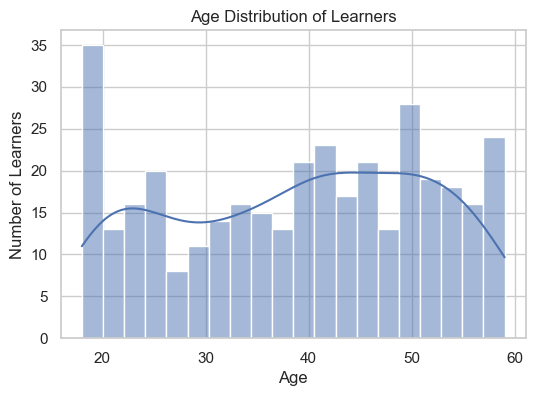

In [110]:
#Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution of Learners")
plt.xlabel("Age")
plt.ylabel("Number of Learners")
plt.savefig("../visualizations/age_distribution.png")
plt.show()

The age distribution shows that most learners fall within the young to mid-career range. This suggests that working professionals form a large portion of the online learning platform users.

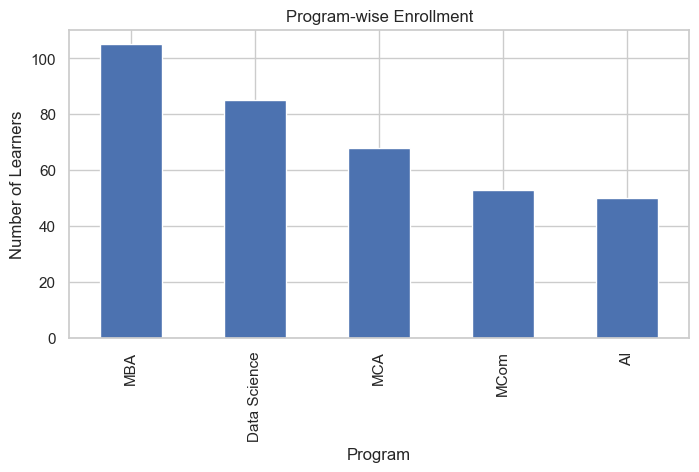

In [93]:
#Program-Wise Enrollment
plt.figure(figsize=(8,4))
df['program'].value_counts().plot(kind='bar')
plt.title("Program-wise Enrollment")
plt.xlabel("Program")
plt.ylabel("Number of Learners")
plt.savefig("../visualizations/program_enrollment.png")
plt.show()

Enrollment varies across programs, indicating differences in popularity and demand for various courses.

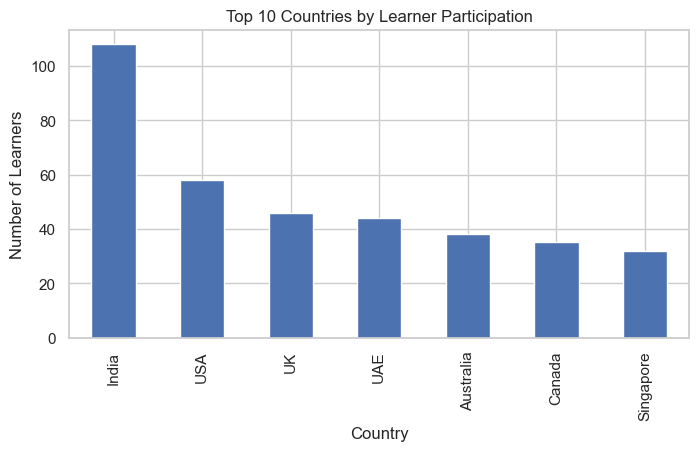

In [95]:
#Top Countries Participation
plt.figure(figsize=(8,4))
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries by Learner Participation")
plt.xlabel("Country")
plt.ylabel("Number of Learners")
plt.savefig("../visualizations/top_countries.png")
plt.show()

The platform has a diverse global user base, with certain countries showing higher participation levels.

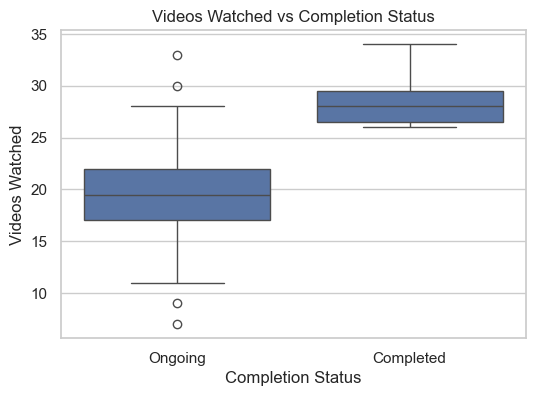

In [97]:
#Videos Watched vs Completion Status
plt.figure(figsize=(6,4))
sns.boxplot(x='completion_status', y='videos_watched', data=df)
plt.title("Videos Watched vs Completion Status")
plt.xlabel("Completion Status")
plt.ylabel("Videos Watched")
plt.savefig("../visualizations/videos_vs_completion.png")
plt.show()

Learners who completed their courses tend to watch more videos compared to those who dropped out. This suggests that video engagement plays a key role in successful course completion.

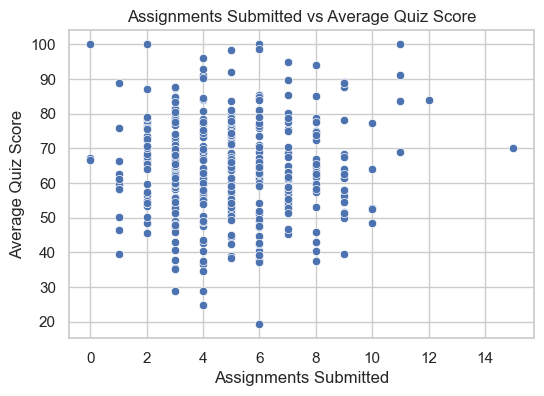

In [99]:
#Assignments Submitted vs Average quiz Score
plt.figure(figsize=(6,4))
sns.scatterplot(x='assignments_submitted', y='avg_quiz_score', data=df)
plt.title("Assignments Submitted vs Average Quiz Score")
plt.xlabel("Assignments Submitted")
plt.ylabel("Average Quiz Score")
plt.savefig("../visualizations/assignments_vs_score.png")
plt.show()

There is a positive relationship between assignments submitted and quiz scores, indicating that learners who actively complete assignments perform better academically.

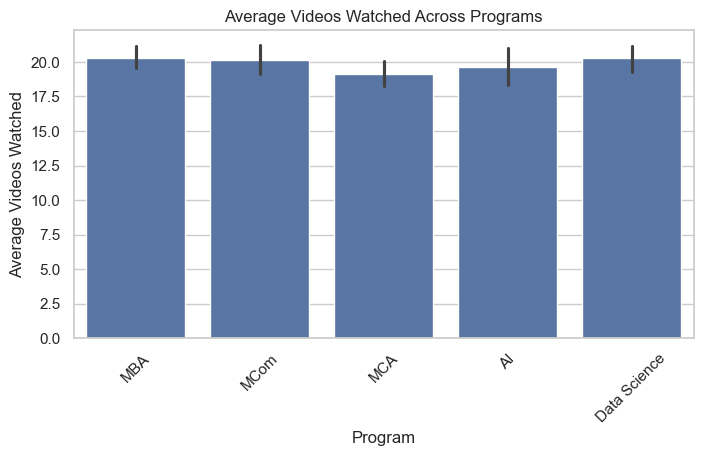

In [101]:
#Engagement Across programs
plt.figure(figsize=(8,4))
sns.barplot(x='program', y='videos_watched', data=df)
plt.title("Average Videos Watched Across Programs")
plt.xlabel("Program")
plt.ylabel("Average Videos Watched")
plt.xticks(rotation=45)
plt.savefig("../visualizations/engagement_across_programs.png")
plt.show()

Engagement levels differ across programs. Some programs show higher average video consumption, indicating stronger learner involvement.

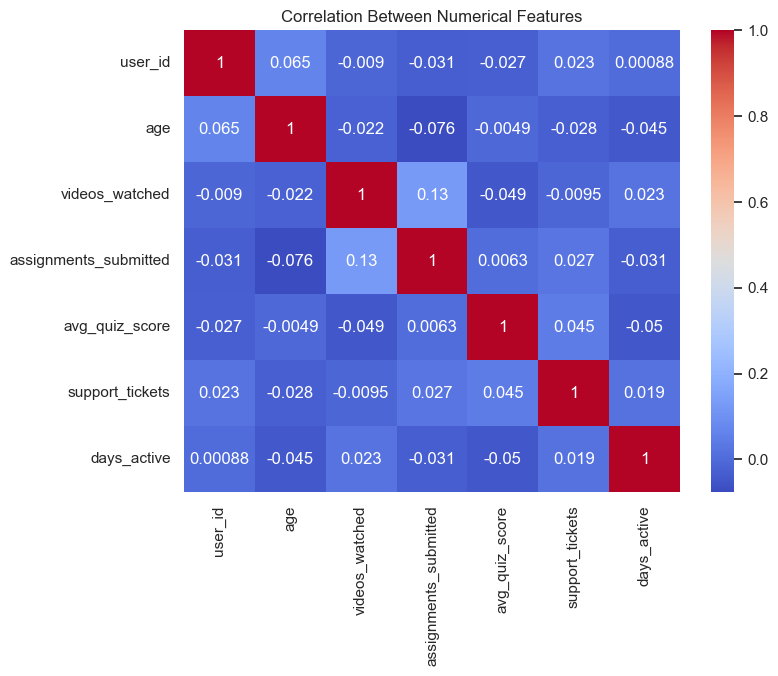

In [103]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numerical Features")

plt.savefig("../visualizations/correlation_heatmap.png")

plt.show()

The correlation heatmap shows relationships between numerical engagement metrics. Strong positive correlations between assignments submitted, quiz scores, and videos watched suggest that active participation is closely linked to better performance.

In [106]:
df.groupby('completion_status')[['videos_watched',
                                 'assignments_submitted',
                                 'avg_quiz_score',
                                 'days_active']].mean()

,videos_watched,assignments_submitted,avg_quiz_score,days_active
completion_status,,,,
Completed,28.210526,7.526316,64.494737,46.263158
Ongoing,19.485380,4.789474,64.483041,66.532164


Learners who completed their courses show significantly higher engagement levels, including more videos watched, more assignments submitted, higher quiz scores, and longer active durations. In contrast, dropped learners exhibit lower engagement across these metrics.

In [108]:
df[df['completion_status'] == 'Dropped'][['videos_watched',
                                          'assignments_submitted',
                                          'avg_quiz_score',
                                          'days_active']].describe()

,videos_watched,assignments_submitted,avg_quiz_score,days_active
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


Lower engagement metrics such as fewer videos watched, fewer assignments submitted, and shorter active durations appear to be early indicators of learner drop-off. Monitoring these behaviors could help identify at-risk learners early.